# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

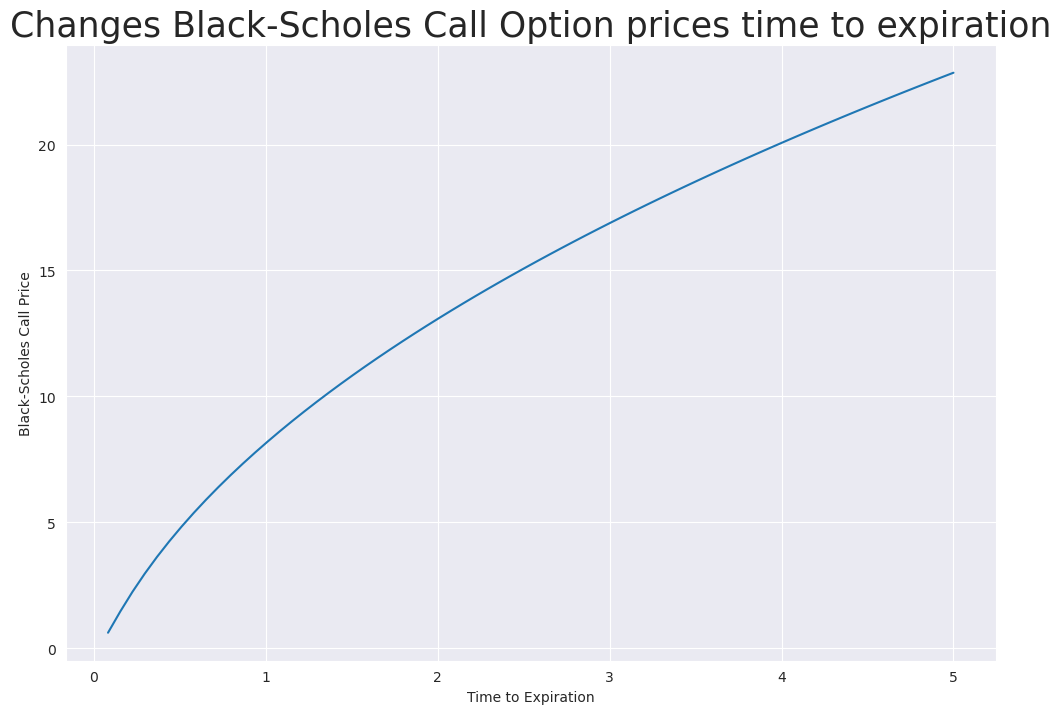

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

### Part (b)

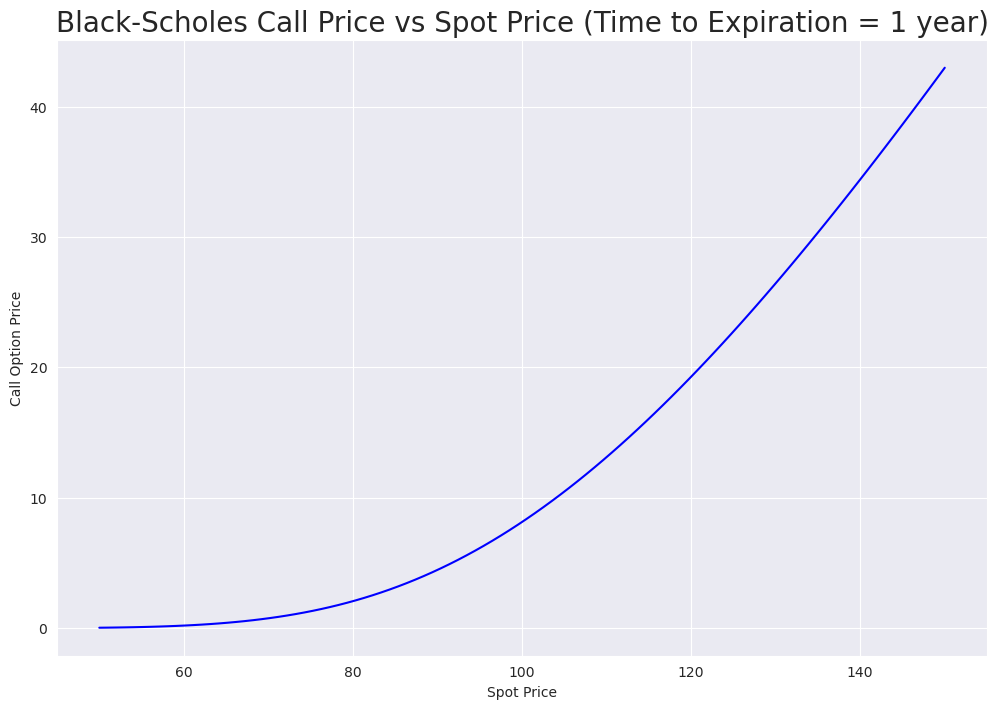

In [3]:
# Range of spot prices
spot_prices = np.linspace(50, 150, 100)
t_fixed = 1  # fix time to expiration

call_prices_vs_spot = [bs_call(S, K, sigma, t=t_fixed) for S in spot_prices]

plt.figure(figsize=(12, 8))
plt.title('Black-Scholes Call Price vs Spot Price (Time to Expiration = 1 year)', size=20)
plt.plot(spot_prices, call_prices_vs_spot, color='blue')
plt.xlabel('Spot Price')
plt.ylabel('Call Option Price')
plt.show()


### Part (c)

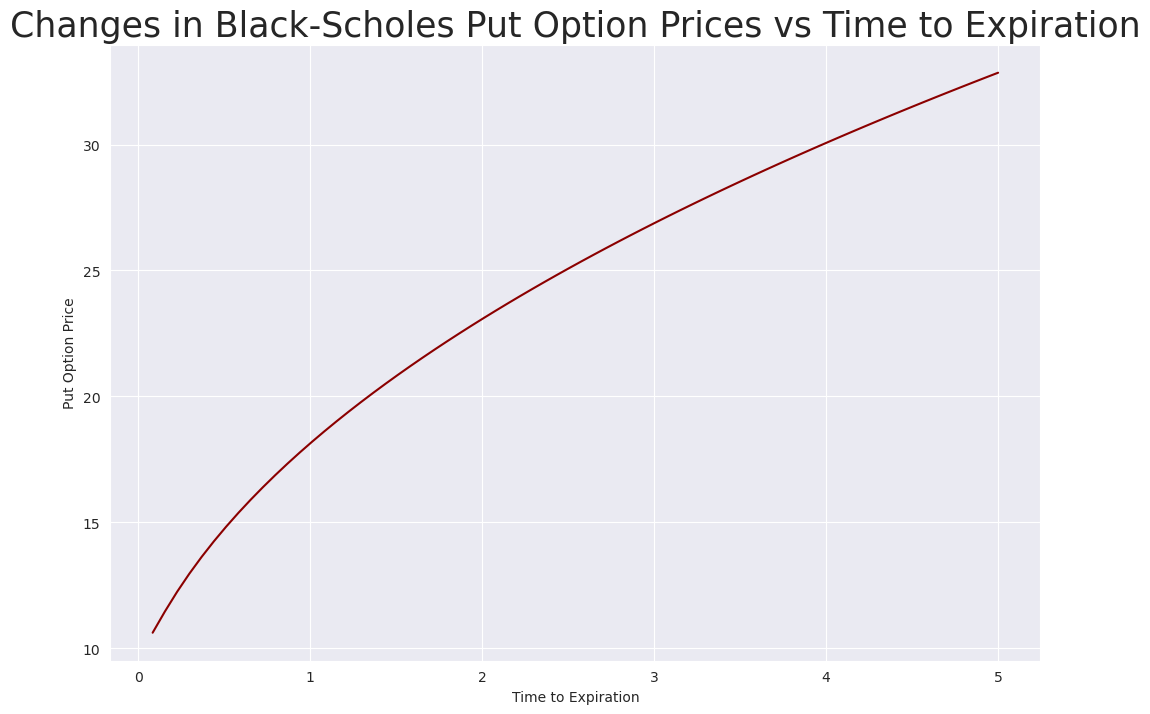

In [5]:
put_prices = [bs_put(S0, K, sigma, t=times[i]) for i in range(len(times))]

plt.figure(figsize=(12, 8))
plt.title('Changes in Black-Scholes Put Option Prices vs Time to Expiration', size=25)
plt.plot(times, put_prices, color='darkred')
plt.xlabel('Time to Expiration')
plt.ylabel('Put Option Price')
plt.show()


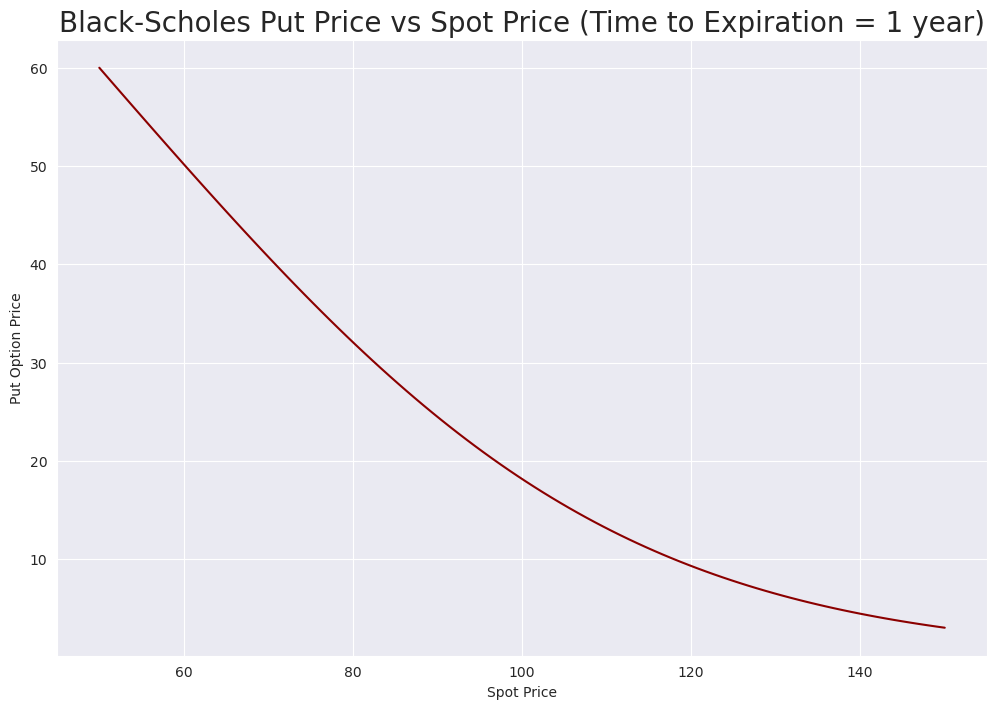

In [6]:
put_prices_vs_spot = [bs_put(S, K, sigma, t=t_fixed) for S in spot_prices]

plt.figure(figsize=(12, 8))
plt.title('Black-Scholes Put Price vs Spot Price (Time to Expiration = 1 year)', size=20)
plt.plot(spot_prices, put_prices_vs_spot, color='darkred')
plt.xlabel('Spot Price')
plt.ylabel('Put Option Price')
plt.show()


### Part(d)

Call Option – Time Sensitivity:
- As time to expiration increases, the call option value generally increases.
- The rate of increase slows down as expiration gets further out (diminishing time value).

Call Option – Spot Price Sensitivity:
- Call price increases with spot price.
- Below the strike price, the call is out-of-the-money and grows slowly.
- Above the strike, the call price increases nearly linearly with spot price.

Put Option – Time Sensitivity:
- As time to expiration increases, the put option value also increases, but the curve is concave.
- The increase is more pronounced when the option is in the money.

Put Option – Spot Price Sensitivity:
- Put price decreases with spot price.
- When spot is far below strike, value is high and decreases steeply with spot price.
- When spot exceeds strike, the put becomes out-of-the-money and value flattens.
